# Case study by Juan Ribes (10/07/2023)

The obejctive is to select the best electric car to buy a new fleet for the Greenwish Ltd sales representatives. 

The database is evdataset.csv with 194 entries for cars and 27 columns of characteristics for each car

The strategy to analyse the data is:
- To explore the data in after opening in pandas
- To cleanse
- To visualize the data and search for outliers
- Establish a point systems with the different categories. Count the number of points of each to decide
- Visualize the best cars

As indication of the importance of variables, the following picture will be used. The variables will be consider in two categories: double points for electric range and battery capacity and one point for the rest.

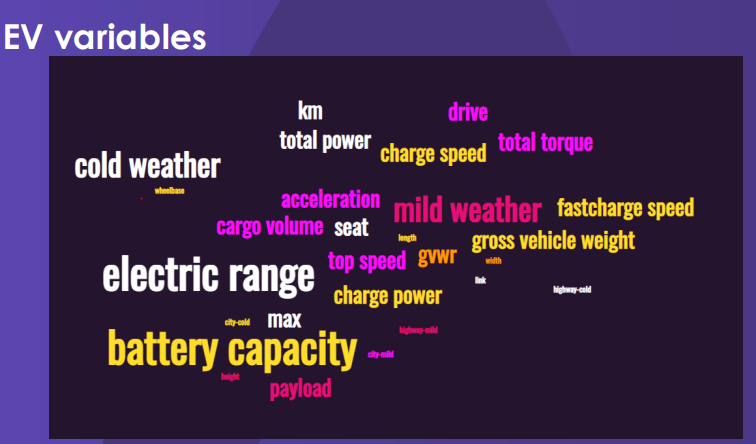

## Explore the data

- Open de data in pandas

In [1]:
import pandas as pd
df_cars = pd.read_csv("evdataset.csv")
df_cars
# Data is stored in a Pandas Dataframe

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5


- Analyse the shape and info of the table

In [2]:
# Check  size of the table
df_cars.shape

(194, 27)

In [3]:
# Find out hte info of the categories
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

Most of the data are integers, meaning that a measure is done. There is no information about units and that will complicate the analysis

In [4]:
# Show general statistics
df_cars.describe()

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1526.257732,343.247423,247.500000,293.144330,502.706186,315.721649,393.608247,7.870619,177.015464,345.592784,...,44.396907,528.711340,4702.087629,1880.061856,1620.706186,2899.829897,2633.139175,619.257732,507.190722,5.536082
std,154.958947,92.173078,75.553656,84.558652,138.297461,98.967440,117.054175,3.168385,38.110213,101.384377,...,15.617918,256.219808,378.219208,68.719346,152.249425,238.567154,415.592250,199.938995,192.411664,1.530768
min,1116.000000,135.000000,95.000000,115.000000,210.000000,125.000000,160.000000,2.800000,125.000000,135.000000,...,24.000000,150.000000,3631.000000,1622.000000,1378.000000,2322.000000,1300.000000,245.000000,171.000000,4.000000
25%,1437.250000,280.000000,185.000000,230.000000,395.000000,230.000000,295.000000,5.400000,150.000000,265.000000,...,34.000000,312.500000,4469.750000,1837.000000,1519.750000,2764.000000,2310.000000,497.000000,405.000000,5.000000
50%,1557.500000,350.000000,250.000000,300.000000,515.000000,320.000000,400.000000,7.400000,160.000000,352.500000,...,46.000000,470.000000,4694.000000,1887.000000,1614.000000,2900.000000,2660.000000,572.500000,472.500000,5.000000
75%,1648.750000,403.750000,295.000000,345.000000,595.000000,375.000000,470.000000,9.650000,200.000000,410.000000,...,51.750000,650.000000,4959.000000,1920.750000,1652.000000,3082.500000,2968.750000,645.000000,558.250000,5.000000
max,1757.000000,595.000000,470.000000,535.000000,895.000000,615.000000,740.000000,19.100000,261.000000,640.000000,...,110.000000,1170.000000,5391.000000,2011.000000,1927.000000,3430.000000,3500.000000,1121.000000,1410.000000,9.000000


General statistics show that most of the data is numeric.

## Data cleansing

- Analyze if there are Null values

In [5]:
# Count null values per column
df_cars.isnull().sum()

id                             0
Make                           0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

In [6]:
# Extract files of null values
df_cars.loc[df_cars.isnull().any(axis=1)]

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats


There are no null values

- Remove possible duplicates

In [7]:
# Check if there is duplicates
df_cars_dup = df_cars.drop_duplicates()
print("The table original dimension are: ", df_cars.shape)
print("The dropped table dimensions are: ", df_cars_dup.shape)

The table original dimension are:  (194, 27)
The dropped table dimensions are:  (194, 27)


There are no duplicates

- Check if there is any error in names (objects columns)

In [8]:
# Survey for errors in the brands of  the cars
df_cars["Make"].unique()

array(['Genesis', 'Mercedes', 'Porsche', 'BMW', 'Volkswagen', 'CUPRA',
       'Skoda', 'MG', 'Volvo', 'Fiat', 'Smart', 'Hyundai', 'Peugeot',
       'Citroen', 'Audi', 'Polestar', 'Toyota', 'Kia', 'DS', 'Ford',
       'Honda', 'JAC', 'Nissan', 'Renault', 'Opel', 'Hongqi', 'Lexus',
       'Dacia', 'Mazda', 'Seres', 'Tesla', 'Jaguar', 'Mini', 'Subaru'],
      dtype=object)

In [9]:
# Search for errors in links
df_cars["link"].unique()

array(['https://ev-database.org/car/1647/Genesis-GV60-Premium',
       'https://ev-database.org/car/1493/Mercedes-EQB-350-4MATIC',
       'https://ev-database.org/car/1229/Porsche-Taycan-Turbo',
       'https://ev-database.org/car/1252/BMW-i4-eDrive40',
       'https://ev-database.org/car/1534/Volkswagen-ID3-Pro-S---5-Seats',
       'https://ev-database.org/car/1178/CUPRA-Born-110-kW---45-kWh',
       'https://ev-database.org/car/1279/Skoda-Enyaq-iV-60',
       'https://ev-database.org/car/1438/Porsche-Taycan-Turbo-Cross-Turismo',
       'https://ev-database.org/car/1281/Skoda-Enyaq-iV-80x',
       'https://ev-database.org/car/1625/Porsche-Taycan-Turbo-Sport-Turismo',
       'https://ev-database.org/car/1280/Skoda-Enyaq-iV-80',
       'https://ev-database.org/car/1475/MG-Marvel-R-Performance',
       'https://ev-database.org/car/1421/Volvo-C40-Recharge-Twin-Pure-Electric',
       'https://ev-database.org/car/1327/Fiat-500e-Hatchback-24-kWh',
       'https://ev-database.org/car/1667/Sma

In [10]:
# Search for errors in drive column
df_cars["Drive"].unique()

array(['Rear', 'AWD', 'Front'], dtype=object)

No evident missing values or error in names

- Identify brand and model from link column. This is needed as it will help to identify the brand and model of car most suitable for our purpose


In [11]:
# Analyse if there is less brands that models.
# Count the models
df_cars["Make"].value_counts()

Mercedes      24
Porsche       18
Audi          16
Volkswagen    13
Peugeot       12
Citroen       11
MG             8
BMW            8
Fiat           8
Toyota         8
Ford           7
Kia            6
Opel           6
Skoda          5
Hyundai        5
Renault        5
Tesla          4
Volvo          4
Genesis        4
CUPRA          4
Polestar       2
Hongqi         2
Smart          2
Honda          2
Nissan         1
Mini           1
JAC            1
Dacia          1
Subaru         1
Lexus          1
DS             1
Mazda          1
Jaguar         1
Seres          1
Name: Make, dtype: int64

In [12]:
# Count the links where to extract the model
df_cars["link"].value_counts()

https://ev-database.org/car/1584/Peugeot-e-2008-SUV                     1
https://ev-database.org/car/1619/Tesla-Model-Y-Long-Range-Dual-Motor    1
https://ev-database.org/car/1540/MG-ZS-EV-Standard-Range                1
https://ev-database.org/car/1240/Mercedes-EQV-300-Long                  1
https://ev-database.org/car/1707/MG-MG4-Electric-51-kWh                 1
                                                                       ..
https://ev-database.org/car/1532/Volkswagen-ID3-Pro-Performance         1
https://ev-database.org/car/1609/Toyota-PROACE-Shuttle-M-50-kWh         1
https://ev-database.org/car/1487/Polestar-2-Long-Range-Single-Motor     1
https://ev-database.org/car/1515/Toyota-PROACE-Verso-L-75-kWh           1
https://ev-database.org/car/1647/Genesis-GV60-Premium                   1
Name: link, Length: 194, dtype: int64

There are a lot of more models than brands, as expected. Model has to be extracted from link. The strategy is to do a function to get de substring from position 33 as it is always where the brand and model starts

In [13]:
# Extracting brand and model
df_cars["model"] = df_cars["link"].apply(lambda x: x[33:])
df_cars.columns

Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats', 'model'],
      dtype='object')

In [14]:
# Check the size of the new database
df_cars.shape

(194, 28)

In [15]:
# Visualize the new column and check the extraction
df_cars_withmodel = df_cars[["Make", "link", "model"]]
df_cars_withmodel

,Make,link,model
0,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,Genesis-GV60-Premium
1,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,Mercedes-EQB-350-4MATIC
2,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,Porsche-Taycan-Turbo
3,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,BMW-i4-eDrive40
4,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,Volkswagen-ID3-Pro-S---5-Seats
...,...,...,...
189,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,Porsche-Taycan-Turbo-S
190,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,Volkswagen-ID3-Pro-S---4-Seats
191,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,Citroen-e-Berlingo-XL-50-kWh
192,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,Audi-Q4-Sportback-e-tron-50-quattro


In [16]:
# Check in the new model column if there are duplicates
df_cars.model.value_counts().sort_values(ascending=False)

Ford-Mustang-Mach-E-ER-AWD           2
Ford-Mustang-Mach-E-GT               2
Porsche-Taycan-Plus-Sport-Turismo    1
Porsche-Taycan-4S-Plus               1
Peugeot-e-Rifter-Long-50-kWh         1
                                    ..
Porsche-Taycan-GTS                   1
Audi-e-tron-S-Sportback              1
Volkswagen-ID3-Pro-Performance       1
Audi-Q4-Sportback-e-tron-35          1
Volkswagen-ID4-GTX                   1
Name: model, Length: 192, dtype: int64

In [17]:
# Search for the row that have counts with value more of one
df_cars.loc[(df_cars.model == "Ford-Mustang-Mach-E-GT") | (df_cars.model == "Ford-Mustang-Mach-E-ER-AWD")]

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,model
46,1672,Ford,https://ev-database.org/car/1672/Ford-Mustang-...,430,305,365,615,385,480,4.4,...,380,4743,1881,1613,2984,2717,444,322,5,Ford-Mustang-Mach-E-GT
105,1671,Ford,https://ev-database.org/car/1671/Ford-Mustang-...,435,310,370,630,395,490,5.8,...,380,4713,1881,1624,2984,2690,508,322,5,Ford-Mustang-Mach-E-ER-AWD
149,1756,Ford,https://ev-database.org/car/1756/Ford-Mustang-...,445,315,375,640,400,500,5.8,...,390,4713,1881,1624,2984,2690,508,322,5,Ford-Mustang-Mach-E-ER-AWD
175,1757,Ford,https://ev-database.org/car/1757/Ford-Mustang-...,430,305,365,615,385,480,4.4,...,380,4743,1881,1613,2984,2717,444,322,5,Ford-Mustang-Mach-E-GT


There are 2 duplicates that have the different id number. They can be dropped (id = 105 and id = 175)


In [18]:
# Drop duplicates and check the index and the number of rows
df_cars = df_cars.drop([105, 175]).reset_index(drop=True)
df_cars

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,model
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,1020,4515,1890,1580,2900,2495,595,432,5,Genesis-GV60-Premium
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,470,4684,1834,1701,2829,2580,480,495,7,Mercedes-EQB-350-4MATIC
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,1020,4963,1966,1381,2900,2880,575,366,4,Porsche-Taycan-Turbo
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,730,4783,1852,1448,2856,2605,555,470,5,BMW-i4-eDrive40
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,570,4261,1809,1568,2771,2300,447,385,5,Volkswagen-ID3-Pro-S---5-Seats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,980,4963,1966,1378,2900,2870,575,366,4,Porsche-Taycan-Turbo-S
188,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,570,4261,1809,1568,2771,2280,420,385,4,Volkswagen-ID3-Pro-S---4-Seats
189,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,310,4753,1921,1849,2975,2440,639,806,7,Citroen-e-Berlingo-XL-50-kWh
190,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,500,4588,1865,1614,2764,2715,575,535,5,Audi-Q4-Sportback-e-tron-50-quattro


In [19]:
# Check if there is duplicates in new table
df_cars.model.value_counts().sort_values(ascending=False)

Tesla-Model-3-Long-Range-Dual-Motor    1
Fiat-E-Ulysse-L3-50-kWh                1
Porsche-Taycan-Plus-Sport-Turismo      1
Porsche-Taycan-4S-Plus                 1
Peugeot-e-Rifter-Long-50-kWh           1
                                      ..
Porsche-Taycan-GTS                     1
Audi-e-tron-S-Sportback                1
Volkswagen-ID3-Pro-Performance         1
Audi-Q4-Sportback-e-tron-35            1
Volkswagen-ID4-GTX                     1
Name: model, Length: 192, dtype: int64

No more duplicates

## Start visualizations

Do a general visualization of all to have an idea of outliers and shapes wit boxplot as it is a very good graphic to spot the median, first and second quartiles and outliers


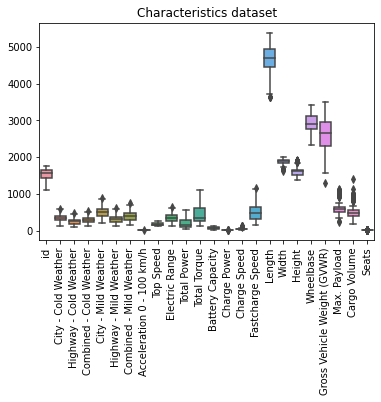

In [20]:
# Visualize all numeric variables in a table 
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df_cars).set_title("Characteristics dataset")
plt.xticks(rotation='vertical')
plt.show()

The units are very different and is difficult to visualize the variables. Start to visualize the variables in an array. 

In [21]:
# To manage better get a list of the columns
df_cars.columns.tolist()

['id',
 'Make',
 'link',
 'City - Cold Weather',
 'Highway - Cold Weather',
 'Combined - Cold Weather',
 'City - Mild Weather',
 'Highway - Mild Weather',
 'Combined - Mild Weather',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'Electric Range',
 'Total Power',
 'Total Torque',
 'Drive',
 'Battery Capacity',
 'Charge Power',
 'Charge Speed',
 'Fastcharge Speed',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume',
 'Seats',
 'model']

In [22]:
# Represent all the data in boxplot graphic by graphic. For this first slice the table 
# to get a table with the numeric variables only
df_vis = df_cars[['Combined - Cold Weather',
  'Combined - Mild Weather',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'Electric Range',
 'Total Power',
 'Total Torque',
 'Battery Capacity',
 'Charge Power',
 'Charge Speed',
 'Fastcharge Speed',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume',
 'Seats']]

df_vis


,Combined - Cold Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,Total Torque,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,330,445,7.8,185,390,168,350,77.4,11.0,49,1020,4515,1890,1580,2900,2495,595,432,5
1,280,375,6.2,160,330,215,520,69.7,11.0,46,470,4684,1834,1701,2829,2580,480,495,7
2,350,470,3.2,260,415,500,850,93.4,11.0,46,1020,4963,1966,1381,2900,2880,575,366,4
3,390,540,5.7,190,470,250,430,83.9,11.0,54,730,4783,1852,1448,2856,2605,555,470,5
4,380,520,7.9,160,450,150,310,82.0,11.0,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,340,450,2.8,260,400,560,1050,93.4,11.0,45,980,4963,1966,1378,2900,2870,575,366,4
188,380,515,7.9,160,450,150,310,82.0,11.0,55,570,4261,1809,1568,2771,2280,420,385,4
189,170,220,11.7,135,195,100,260,50.0,7.4,27,310,4753,1921,1849,2975,2440,639,806,7
190,340,460,6.2,180,400,220,460,82.0,11.0,49,500,4588,1865,1614,2764,2715,575,535,5


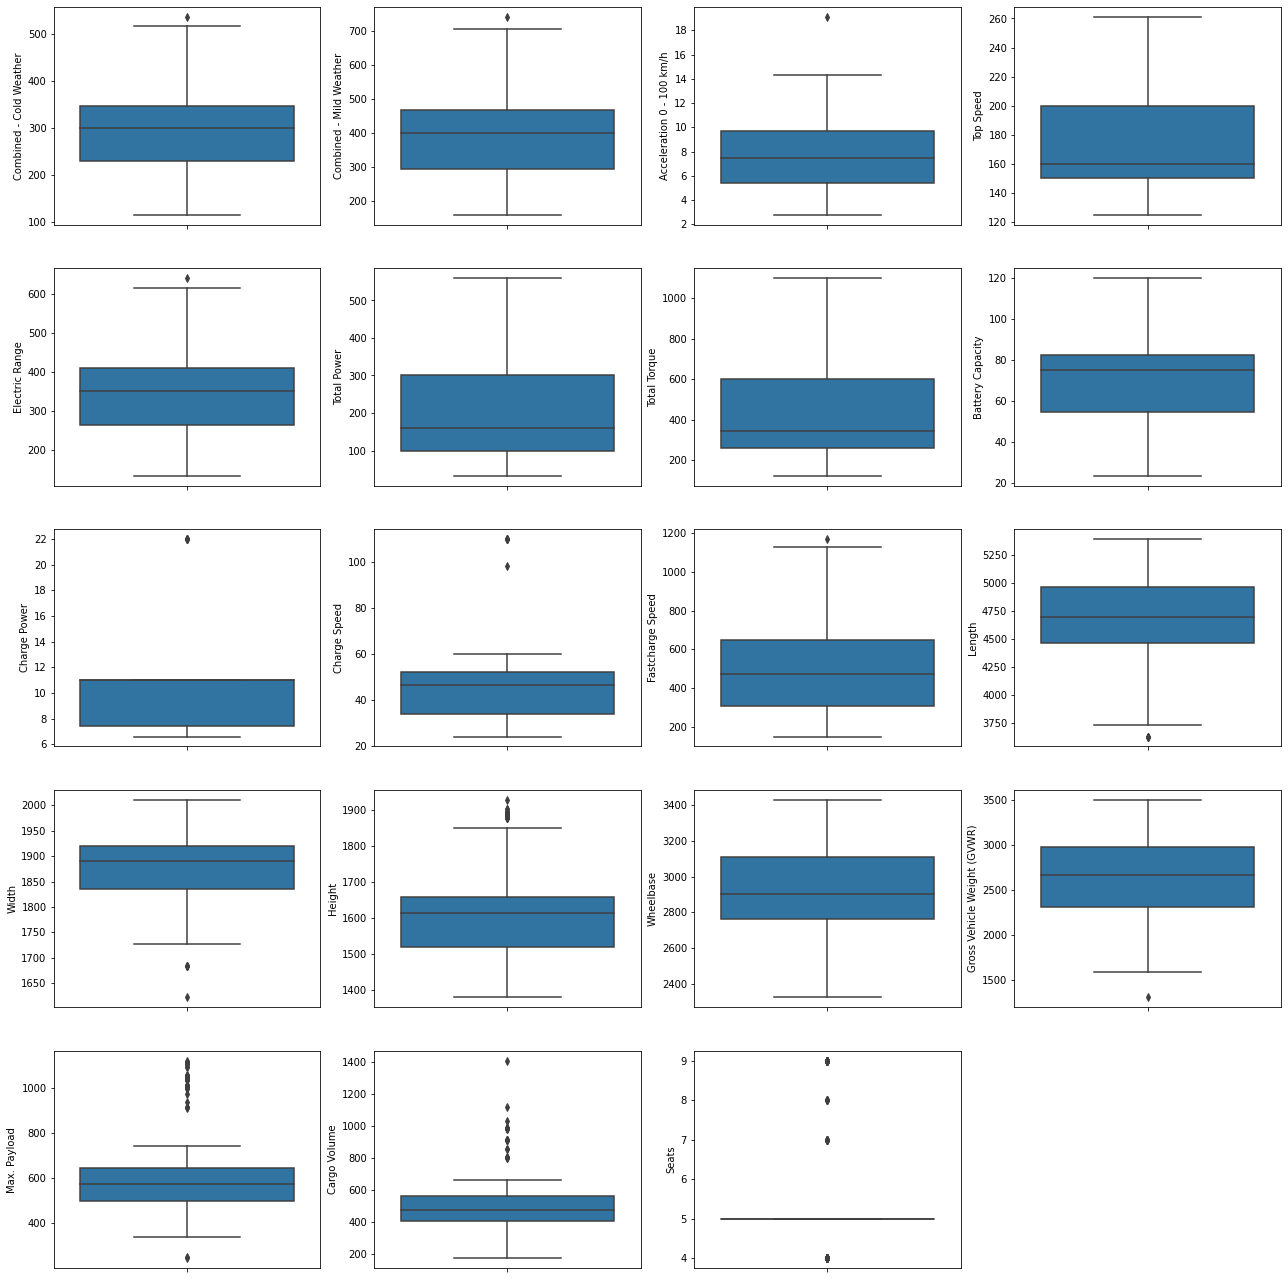

In [23]:
# Represent each variable in a boxplot
figure = plt.figure(figsize=(22,28))
count = 0

for variable in df_vis:
  count += 1
  plt.subplot(6, 4, count)
  ax = sns.boxplot(y = variable, data = df_cars)
plt.show()

The visuallizations are good but they give poor information about outliers. Represent the variables together when the units are similar in number, if not represnet individually. 

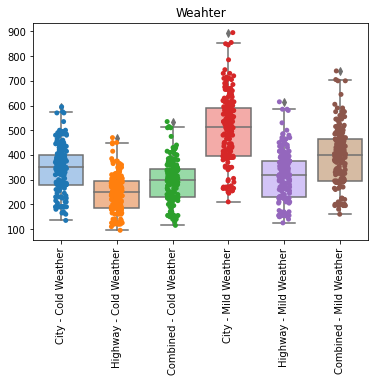

In [24]:
# Visualize weather columns
ax = sns.boxplot(data=df_cars[['City - Cold Weather',
                         'Highway - Cold Weather',
                         'Combined - Cold Weather',
                         'City - Mild Weather',
                         'Highway - Mild Weather',
                         'Combined - Mild Weather']], palette="pastel").set_title("Weahter")
sns.stripplot(data=df_cars[['City - Cold Weather',
                         'Highway - Cold Weather',
                         'Combined - Cold Weather',
                         'City - Mild Weather',
                         'Highway - Mild Weather',
                         'Combined - Mild Weather']])
plt.xticks(rotation='vertical')
plt.show()

It seems that combined is taking into account City and Highway Weather. Check if it is an average of both

In [25]:
# Check if the Combined weather is the mean of City and Highway
df_cars["mean_cold"] = df_cars[["City - Cold Weather","Highway - Cold Weather"]].mean(axis=1)
df_cars[["City - Cold Weather", "Highway - Cold Weather", "Combined - Cold Weather", "mean_cold"]].head(10)

,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,mean_cold
0,390,275,330,332.5
1,330,235,280,282.5
2,400,305,350,352.5
3,445,340,390,392.5
4,440,320,380,380.0
5,270,195,230,232.5
6,320,235,275,277.5
7,395,290,340,342.5
8,395,290,340,342.5
9,395,295,345,345.0


The combination is avoiding decimals when doing average. The transfromation of data is if one column finish in 5 round the number to zero and then do the average. The combination can be used and remove the city and highway columns if desired.

In [26]:
# Do the same that before for mild weather
df_cars["mean_mild"] = df_cars[["City - Mild Weather","Highway - Mild Weather"]].mean(axis=1)
df_cars[["City - Mild Weather", "Highway - Mild Weather", "Combined - Mild Weather", "mean_mild"]].head(10)

,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,mean_mild
0,575,355,445,465.0
1,480,300,375,390.0
2,580,385,470,482.5
3,670,440,540,555.0
4,660,415,520,537.5
5,415,255,320,335.0
6,480,300,375,390.0
7,565,370,455,467.5
8,580,370,460,475.0
9,565,375,460,470.0


The combination is avoiding decimals when doing average. The transfromation of data is if reducing 15 of each column. The combination can be used and remove the city and highway columns and use combination only

In [27]:
# Drop the columns in df_cars and check size
df_cars.drop(columns=["mean_cold", "mean_mild"], inplace=True)
df_cars.shape

(192, 28)

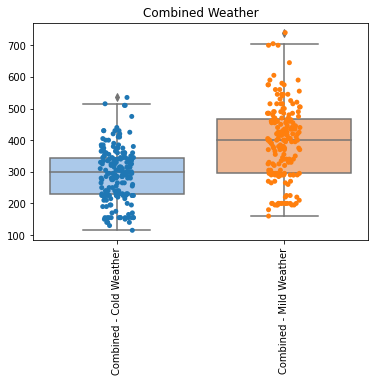

In [28]:
# Visualize weather columns combination only
ax = sns.boxplot(data=df_cars[['Combined - Cold Weather',
                          'Combined - Mild Weather']], palette="pastel").set_title("Combined Weather")
sns.stripplot(data=df_cars[['Combined - Cold Weather',
                          'Combined - Mild Weather']])
plt.xticks(rotation='vertical')
plt.show()

Not clear outliers except one in combined mild weather. Check the max value to see if is outlier

In [29]:
df_cars["Combined - Cold Weather"].max()

535

The value is not excessivily high, it can be kept

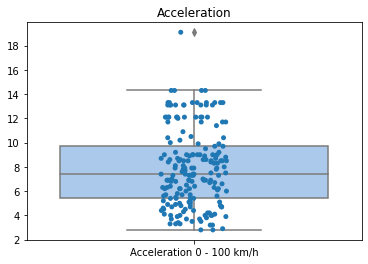

In [30]:
# Show acceleration
ax = sns.boxplot(data=df_cars[["Acceleration 0 - 100 km/h"]], palette="pastel").set_title("Acceleration")
sns.stripplot(data=df_cars[["Acceleration 0 - 100 km/h"]])
plt.show()

More sure that the top is an outlier. Identify it with maximum

In [31]:
# search max acceleration
df_cars["Acceleration 0 - 100 km/h"].max()

19.1

In [32]:
df_cars.loc[df_cars["Acceleration 0 - 100 km/h"]>19]

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,model
120,1705,Dacia,https://ev-database.org/car/1705/Dacia-Spring-...,160,110,130,245,140,180,19.1,...,170,3734,1622,1516,2423,1300,363,300,4,Dacia-Spring-Electric


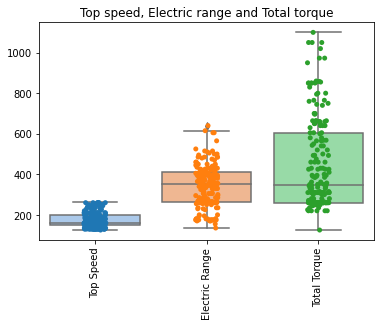

In [33]:
# Show top speed, electric reange and total torque together as the units are similar
ax = sns.boxplot(data=df_cars[['Top Speed', 'Electric Range', "Total Torque"]], palette="pastel").set_title("Top speed, Electric range and Total torque")
sns.stripplot(data=df_cars[['Top Speed', 'Electric Range', "Total Torque"]])
plt.xticks(rotation='vertical')
plt.show()

No evident outlier

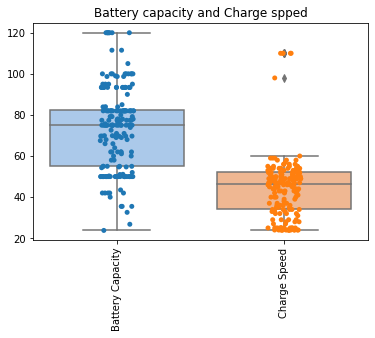

In [34]:
# Show battery capacity, charge power and charge speed in the same plot as they have similar units
ax = sns.boxplot(data=df_cars[["Battery Capacity", "Charge Speed"]], palette="pastel").set_title("Battery capacity and Charge spped")
sns.stripplot(data=df_cars[["Battery Capacity", "Charge Speed"]])
plt.xticks(rotation='vertical')
plt.show()

No evident outliers as enought data is on top or bottom

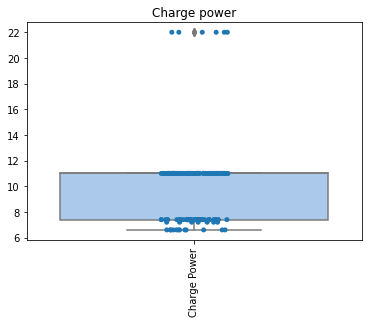

In [35]:
# Show charge power
ax = sns.boxplot(data=df_cars[["Charge Power"]], palette="pastel").set_title("Charge power")
sns.stripplot(data=df_cars[["Charge Power"]])
plt.xticks(rotation='vertical')
plt.show()

Not evident outliers as several data is on top

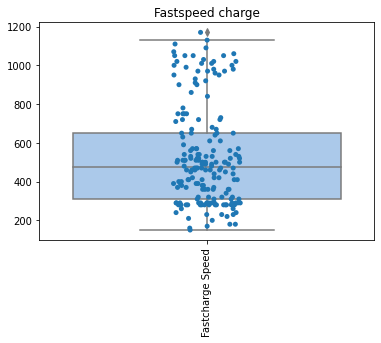

In [36]:
# Show fastcharge speed
ax = sns.boxplot(data=df_cars[["Fastcharge Speed"]], palette="pastel").set_title("Fastspeed charge")
sns.stripplot(data=df_cars[["Fastcharge Speed"]])
plt.xticks(rotation='vertical')
plt.show()

Not evident outliers

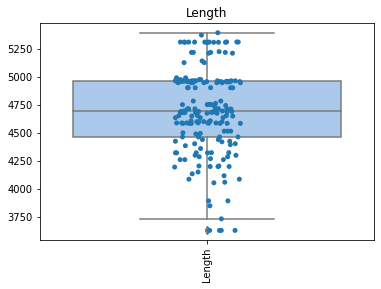

In [37]:
# Show lenghth
ax = sns.boxplot(data=df_cars[['Length']], palette="pastel").set_title("Length")
sns.stripplot(data=df_cars[['Length']])
plt.xticks(rotation='vertical')
plt.show()

Not evident outliers

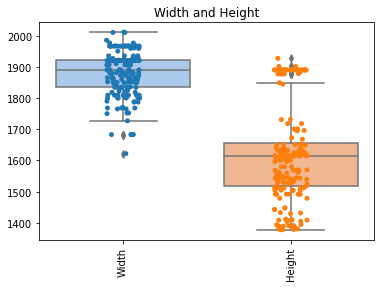

In [38]:
# Show width and height in the same plot as they have similar units
ax = sns.boxplot(data=df_cars[['Width',
                            'Height']], palette="pastel").set_title("Width and Height")
sns.stripplot(data=df_cars[['Width',
                            'Height']])
plt.xticks(rotation='vertical')
plt.show()

No evident outliers

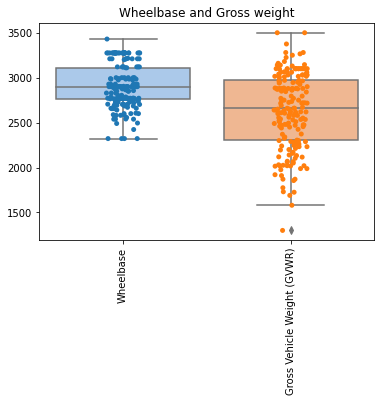

In [39]:
# Show Wheelbase and GVWR in the same plot as they have similar units
ax = sns.boxplot(data=df_cars[['Wheelbase',
                            'Gross Vehicle Weight (GVWR)']], palette="pastel").set_title("Wheelbase and Gross weight")
sns.stripplot(data=df_cars[['Wheelbase',
                            'Gross Vehicle Weight (GVWR)']])
plt.xticks(rotation='vertical')
plt.show()

Possible outlier in GVWR, check the size with min and searh for the model

In [40]:
# check if GVWR is outlier
df_cars["Gross Vehicle Weight (GVWR)"].min()

1300

In [41]:
df_cars.loc[df_cars["Gross Vehicle Weight (GVWR)"]==1300]

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,model
120,1705,Dacia,https://ev-database.org/car/1705/Dacia-Spring-...,160,110,130,245,140,180,19.1,...,170,3734,1622,1516,2423,1300,363,300,4,Dacia-Spring-Electric


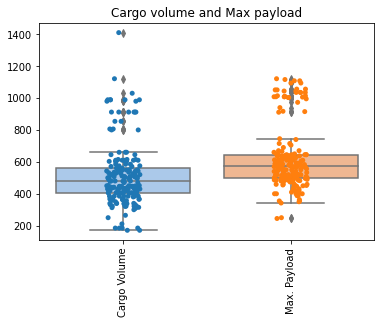

In [42]:
# Show cargo and payload in the same plot as they have similar units
ax = sns.boxplot(data=df_cars[['Cargo Volume', 'Max. Payload']], palette="pastel").set_title("Cargo volume and Max payload")
sns.stripplot(data=df_cars[['Cargo Volume', 'Max. Payload']])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
# Check if it is an outlier
df_cars["Cargo Volume"].max()


1410

In [44]:
df_cars.loc[df_cars["Cargo Volume"]>1400]

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,model
119,1315,Mercedes,https://ev-database.org/car/1315/Mercedes-EQV-...,325,215,265,445,265,335,13.1,...,310,5370,1928,1901,3430,3500,915,1410,7,Mercedes-EQV-300-Extra-Long


No evident outlier. Maybe the max cargo as it is not in the max pyaload an equivalent one. But there is the possibility that the car is big but can't not have too much weight

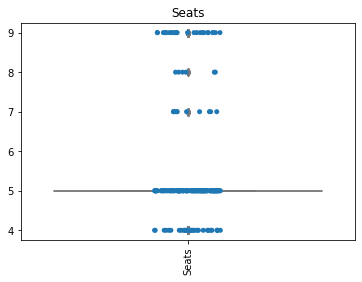

In [45]:
# Show seats
ax = sns.boxplot(data=df_cars[['Seats']], palette="pastel").set_title("Seats")
sns.stripplot(data=df_cars[['Seats']])
plt.xticks(rotation='vertical')
plt.show()

No evident outliers

# Decision by a point system

In [46]:
list = df_cars.columns.tolist
list

<bound method IndexOpsMixin.tolist of Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats', 'model'],
      dtype='object')>

A point will be awarded when the car is above the 3th quartile of the data for the following characterishthics:
- City Cold Combined. p1
- City High Combined. p2
- Acceleration. p3
- Top Speed. p4
- Electric Range. Counts double. p5 and p6
- Total Power. p7
- Total Torque. p8
- Battery Capacity. Counts double. p9 and p10
- Charge Power. p11
- Charge Speed. p12
- Fastcharge Speed. p13
- Max. Payload. p14
- Cargo Volume. p15

In total 15 points available. Write the code to select only the cars that are in the 3th quartile, that is equivalent to the 25% best performers cars. Everytime check the size of the table, ie, how many cars are inside that quartile for the point classification


In [47]:
p1 = df_cars[["model", "Combined - Cold Weather"]].loc[df_cars["Combined - Cold Weather"]>df_cars["Combined - Cold Weather"].quantile(0.75)]
p1.shape

(46, 2)

In [48]:
p2 = df_cars[["model", "Combined - Mild Weather"]].loc[df_cars["Combined - Mild Weather"]>df_cars["Combined - Mild Weather"].quantile(0.75)]
p2.shape

(48, 2)

In [49]:
p3 = df_cars[["model", "Acceleration 0 - 100 km/h"]].loc[df_cars["Acceleration 0 - 100 km/h"]>df_cars["Acceleration 0 - 100 km/h"].quantile(0.75)]
p3.shape


(47, 2)

In [50]:
p4 = df_cars[["model", "Top Speed"]].loc[df_cars["Top Speed"]>df_cars["Top Speed"].quantile(0.75)]
p4.shape

(47, 2)

In [51]:
p5 = df_cars[["model", "Electric Range"]].loc[df_cars["Electric Range"]>df_cars["Electric Range"].quantile(0.75)]
p5.shape

(45, 2)

In [52]:
p6 = df_cars[["model", "Electric Range"]].loc[df_cars["Electric Range"]>df_cars["Electric Range"].quantile(0.75)]
p6.shape

(45, 2)

In [53]:
p7 = df_cars[["model", "Total Power"]].loc[df_cars["Total Power"]>df_cars["Total Power"].quantile(0.75)]
p7.shape

(40, 2)

In [54]:
p8 = df_cars[["model", "Total Torque"]].loc[df_cars["Total Torque"]>df_cars["Total Torque"].quantile(0.75)]
p8.shape

(48, 2)

In [55]:
p9 = df_cars[["model", "Battery Capacity"]].loc[df_cars["Battery Capacity"]>df_cars["Battery Capacity"].quantile(0.75)]
p9.shape

(48, 2)

In [56]:
p10 = df_cars[["model", "Battery Capacity"]].loc[df_cars["Battery Capacity"]>df_cars["Battery Capacity"].quantile(0.75)]
p10.shape

(48, 2)

In [57]:
p11 = df_cars[["model", "Charge Power"]].loc[df_cars["Charge Power"]>df_cars["Charge Power"].quantile(0.75)]
p11.shape

(6, 2)

In [58]:
p12 = df_cars[["model", "Charge Speed"]].loc[df_cars["Charge Speed"]>df_cars["Charge Speed"].quantile(0.75)]
p12.shape

(39, 2)

In [59]:
p13 = df_cars[["model", "Fastcharge Speed"]].loc[df_cars["Fastcharge Speed"]>df_cars["Fastcharge Speed"].quantile(0.75)]
p13.shape

(47, 2)

In [60]:
p14 = df_cars[["model", "Max. Payload"]].loc[df_cars["Max. Payload"]>df_cars["Max. Payload"].quantile(0.75)]
p14.shape

(45, 2)

In [61]:
p15 = df_cars[["model", "Cargo Volume"]].loc[df_cars["Cargo Volume"]>df_cars["Cargo Volume"].quantile(0.75)]
p15.shape

(47, 2)

Summarize points

In [62]:
# Concatenate all points tables
df_points = pd.concat([p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15], axis=0)
df_points.shape

(646, 14)

In [63]:
df_points

,model,Combined - Cold Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,Total Torque,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Max. Payload,Cargo Volume
2,Porsche-Taycan-Turbo,350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BMW-i4-eDrive40,390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Volkswagen-ID3-Pro-S---5-Seats,380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Skoda-Enyaq-iV-80,355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Mercedes-EQE-AMG-53-4MATICplus,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Audi-e-tron-Sportback-55-quattro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615.0
176,Mercedes-EQS-450-4MATIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,610.0
181,Opel-Vivaro-e-Combi-L-75-kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,912.0
189,Citroen-e-Berlingo-XL-50-kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,806.0


In [64]:
# Count the unique values
counts = df_points["model"].value_counts()
counts.head(25)

Porsche-Taycan-4S-Cross-Turismo         11
Mercedes-EQS-AMG-53-4MATICplus          11
Porsche-Taycan-Plus                     11
Porsche-Taycan-4S-Plus                  11
Mercedes-EQS-500-4MATIC                 11
Mercedes-EQS-450-4MATIC                 11
Mercedes-EQS-580-4MATIC                 11
Porsche-Taycan-4S-Plus-Sport-Turismo    10
Porsche-Taycan-GTS-Sport-Turismo        10
Mercedes-EQE-AMG-53-4MATICplus          10
Porsche-Taycan-Turbo                    10
Porsche-Taycan-4-Cross-Turismo          10
Mercedes-EQS-450plus                    10
BMW-i4-M50                              10
Porsche-Taycan-GTS                      10
Audi-e-tron-GT-quattro                  10
Mercedes-EQS-SUV-450-4MATIC              9
BMW-iX-M60                               9
BMW-i7-xDrive60                          9
Mercedes-EQE-500-4MATIC                  9
Porsche-Taycan-Plus-Sport-Turismo        9
BMW-iX-xDrive50                          9
Mercedes-EQE-AMG-43-4MATIC               9
Mercedes-EQ

In [65]:
# Pass to a list the first 25 counts and the models to get a graphic
list_models = counts[0:25].index.tolist()
list_models

['Porsche-Taycan-4S-Cross-Turismo',
 'Mercedes-EQS-AMG-53-4MATICplus',
 'Porsche-Taycan-Plus',
 'Porsche-Taycan-4S-Plus',
 'Mercedes-EQS-500-4MATIC',
 'Mercedes-EQS-450-4MATIC',
 'Mercedes-EQS-580-4MATIC',
 'Porsche-Taycan-4S-Plus-Sport-Turismo',
 'Porsche-Taycan-GTS-Sport-Turismo',
 'Mercedes-EQE-AMG-53-4MATICplus',
 'Porsche-Taycan-Turbo',
 'Porsche-Taycan-4-Cross-Turismo',
 'Mercedes-EQS-450plus',
 'BMW-i4-M50',
 'Porsche-Taycan-GTS',
 'Audi-e-tron-GT-quattro',
 'Mercedes-EQS-SUV-450-4MATIC',
 'BMW-iX-M60',
 'BMW-i7-xDrive60',
 'Mercedes-EQE-500-4MATIC',
 'Porsche-Taycan-Plus-Sport-Turismo',
 'BMW-iX-xDrive50',
 'Mercedes-EQE-AMG-43-4MATIC',
 'Mercedes-EQE-350plus',
 'Tesla-Model-3-Performance']

In [66]:
# list of points
list_points = counts[0:25].tolist()
list_points


[11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9]

Text(0.5, 0, 'Points (max 15)')

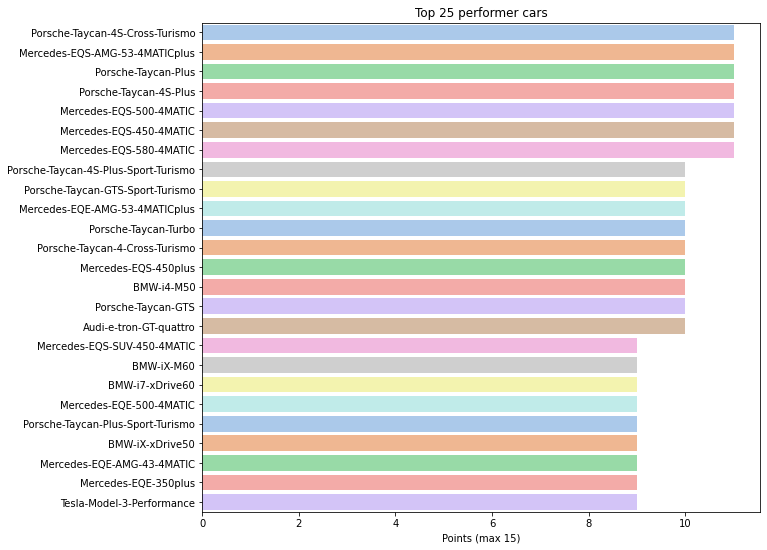

In [67]:
# Represent points for 25 top cars
figure = plt.figure(figsize=(10,9))
sns.barplot(x=list_points, y=list_models, palette="pastel").set_title("Top 25 performer cars")
plt.xlabel('Points (max 15)')

Check that there is not low performers

In [68]:
# Change the index to select model cars
df_cars_modelindex = df_cars.set_index("model")
df_cars_selected = df_cars_modelindex.loc[list_models]
df_cars_selected.shape

(25, 27)

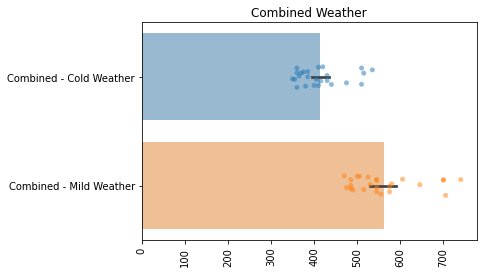

In [69]:
# Represent combined weather
ax = sns.barplot(data=df_cars_selected[['Combined - Cold Weather',
                                        'Combined - Mild Weather']], alpha=0.5, orient='h')

sns.stripplot(data=df_cars_selected[['Combined - Cold Weather',
                         'Combined - Mild Weather']], alpha=0.5, orient='h').set_title("Combined Weather")
plt.xticks(rotation='vertical')
plt.show()

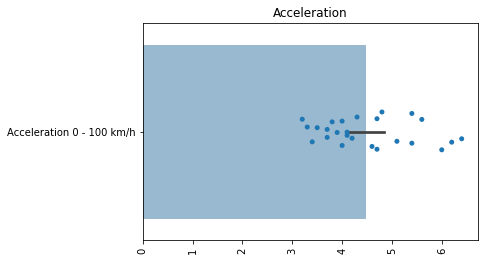

In [70]:
# Represent acceleration
ax = sns.barplot(data=df_cars_selected[['Acceleration 0 - 100 km/h']], alpha=0.5,orient='h').set_title("Acceleration")
sns.stripplot(data=df_cars_selected[['Acceleration 0 - 100 km/h']], orient='h')
plt.xticks(rotation='vertical')
plt.show()

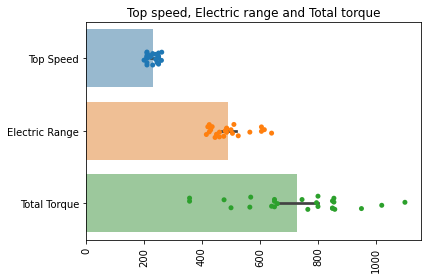

In [71]:
# Represent top speed, electric range and total torque
ax = sns.barplot(data=df_cars_selected[['Top Speed', 'Electric Range', "Total Torque"]], alpha=0.5, orient="h").set_title("Top speed, Electric range and Total torque")
sns.stripplot(data=df_cars_selected[['Top Speed', 'Electric Range', "Total Torque"]], orient ="h")
plt.xticks(rotation='vertical')
plt.show()

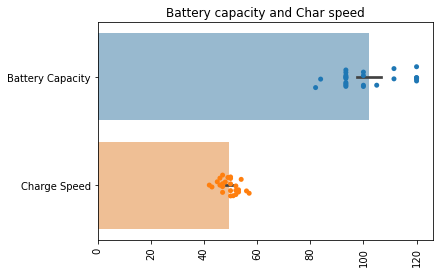

In [72]:
# Represent battery capacity and charge speed
ax = sns.barplot(data=df_cars_selected[["Battery Capacity", "Charge Speed"]], alpha=0.5, orient="h").set_title("Battery capacity and Char speed")
sns.stripplot(data=df_cars_selected[["Battery Capacity", "Charge Speed"]], orient ="h")
plt.xticks(rotation='vertical')
plt.show()

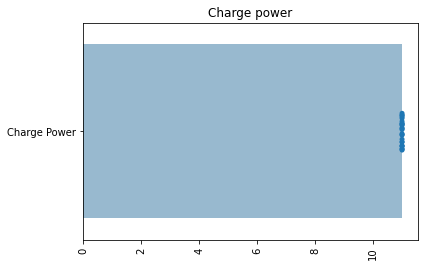

In [73]:
# Represent charge power
ax = sns.barplot(data=df_cars_selected[["Charge Power"]], alpha=0.5, orient="h").set_title("Charge power")
sns.stripplot(data=df_cars_selected[["Charge Power"]], orient ="h")
plt.xticks(rotation='vertical')
plt.show()

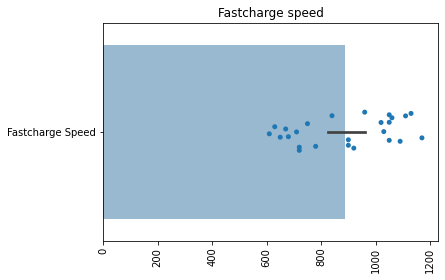

In [74]:
# Represent fastcharge speed
ax = sns.barplot(data=df_cars_selected[["Fastcharge Speed"]], alpha=0.5, orient="h").set_title("Fastcharge speed")
sns.stripplot(data=df_cars_selected[["Fastcharge Speed"]], orient ="h")
plt.xticks(rotation='vertical')
plt.show()

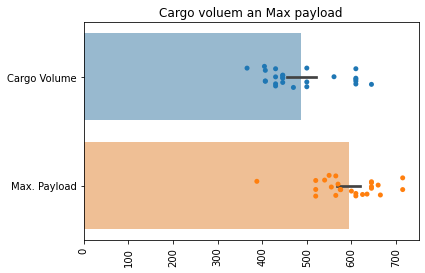

In [75]:
# Represent cargo volume and payload
ax = sns.barplot(data=df_cars_selected[['Cargo Volume', 'Max. Payload']], alpha=0.5, orient="h").set_title("Cargo voluem an Max payload")
sns.stripplot(data=df_cars_selected[['Cargo Volume', 'Max. Payload']], orient ="h")
plt.xticks(rotation='vertical')
plt.show()

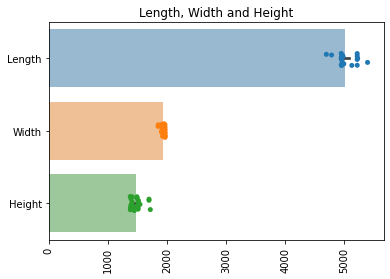

In [76]:
# Represent dimensions
ax = sns.barplot(data=df_cars_selected[['Length', 'Width', 'Height']], alpha=0.5, orient="h").set_title("Length, Width and Height")
sns.stripplot(data=df_cars_selected[['Length', 'Width', 'Height']], orient ="h")
plt.xticks(rotation='vertical')
plt.show()

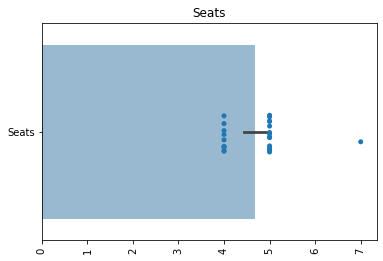

In [77]:
# Represent seats
ax = sns.barplot(data=df_cars_selected[['Seats']], alpha=0.5, orient="h").set_title("Seats")
sns.stripplot(data=df_cars_selected[['Seats']], orient ="h")
plt.xticks(rotation='vertical')
plt.show()

There are not low performers in the 25 cars dataset except for total torque, but still are in a good range

# Conclusions

The next figure summarize the best performers cars in the points system

Text(0.5, 0, 'Points (max 15)')

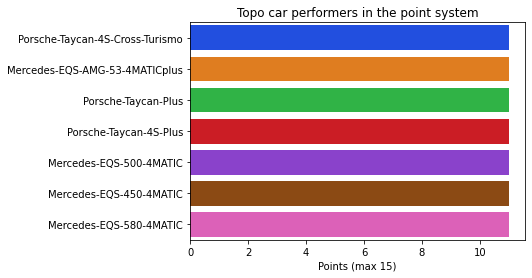

In [78]:
# Select the cars with 11 points (max points and do a graphic
list_models_11p = counts[0:7].index.tolist()
list_points_11p = counts[0:7].tolist()

sns.barplot(x=list_points_11p, y=list_models_11p, palette="bright").set_title("Topo car performers in the point system")
plt.xlabel('Points (max 15)')

With this results the best brand of cars for the points analyzed is Mercedes as it has 4 cars in the top 7 list (11 out of 15 points). The second best brand is Porsche that have 3 out of 7 cars in the top list (11 out of 15 points).

To decide the best model this result can be presented to  stakeholders to make a decision. More information would be helpful to take into account other considerations as seats or price that could decide to acquire a model.

In this study 13 variables has been taken into account, with the variables battery capacity and electric range counting double points. If they are considered more important more points can be assigned to them to have more value. Other variables as dimensions are not taking into account as there is no information about its importance. 
